In [40]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(512, activation='sigmoid'))
model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [8]:
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history3 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.5198 - acc: 0.7903 - val_loss: 0.3893 - val_acc: 0.8699
Epoch 2/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3107 - acc: 0.9009 - val_loss: 0.3097 - val_acc: 0.8870
Epoch 3/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2300 - acc: 0.9255 - val_loss: 0.2816 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1825 - acc: 0.9408 - val_loss: 0.2889 - val_acc: 0.8829
Epoch 5/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.1506 - acc: 0.9503 - val_loss: 0.2797 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1216 - acc: 0.9619 - val_loss: 0.2878 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1021 - acc: 0.9684 - val_loss: 0.3090 - val_acc

15000/15000 [==============================] - 1s 72us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.9033 - val_acc: 0.8590
Epoch 20/20
15000/15000 [==============================] - 1s 81us/step - loss: 7.9419e-04 - acc: 0.9999 - val_loss: 0.9180 - val_acc: 0.8595


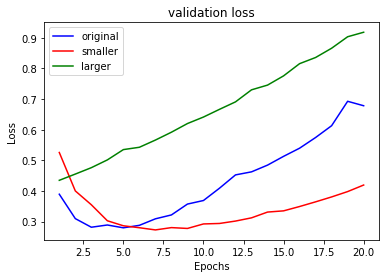

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

val_acc1 = history1.history['val_acc']
val_loss1 = history1.history['val_loss']
val_acc2 = history2.history['val_acc']
val_loss2 = history2.history['val_loss']
val_acc3 = history3.history['val_acc']
val_loss3 = history3.history['val_loss']


epochs = range(1, len(val_acc1) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, val_loss1, 'blue', label='original')
# b is for "solid blue line"
plt.plot(epochs, val_loss2, 'red', label='smaller')
plt.plot(epochs, val_loss3, 'green', label='larger')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
from keras import regularizers

#重みパラメータを正則化するモデルの作成
model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                       activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),
                       activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/step - loss: 1.1093 - acc: 0.7332 - val_loss: 0.7321 - val_acc: 0.8365
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.6879 - acc: 0.8405 - val_loss: 0.6600 - val_acc: 0.8524
Epoch 3/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.6394 - acc: 0.8527 - val_loss: 0.6321 - val_acc: 0.8574
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.6116 - acc: 0.8605 - val_loss: 0.6148 - val_acc: 0.8595
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.5939 - acc: 0.8639 - val_loss: 0.5927 - val_acc: 0.8634
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.5820 - acc: 0.8625 - val_loss: 0.6131 - val_acc: 0.8478
Epoch 7/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.5681 - acc: 0.8661 - val_loss: 0.5830 - val_acc

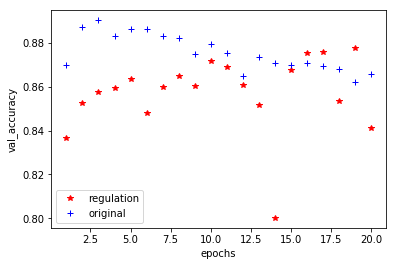

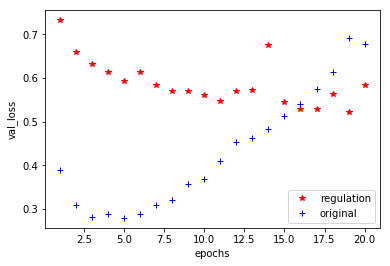

In [32]:
history.history.keys()
historyory_dict=history.history
val_acc=historyory_dict['val_acc']
plt.plot(epochs,val_acc,'red',marker='*',linestyle='None',label='regulation')
plt.plot(epochs,val_acc1,'blue',marker='+',linestyle='None',label='original')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

history.history.keys()
historyory_dict=history.history
val_loss=historyory_dict['val_loss']
plt.plot(epochs,val_loss,'red',marker='*',linestyle='None',label='regulation')
plt.plot(epochs,val_loss1,'blue',marker='+',linestyle='None',label='original')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend()
plt.show()

In [42]:
model_dropout=models.Sequential()
model_dropout.add(layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(l=0.01),input_shape=(10000,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16,activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1,activation='sigmoid'))
model_dropout.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

                  

In [43]:
history_dropout = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3744 - acc: 0.9340 - val_loss: 0.5000 - val_acc: 0.8776
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.3763 - acc: 0.9325 - val_loss: 0.5263 - val_acc: 0.8675
Epoch 3/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3748 - acc: 0.9347 - val_loss: 0.5045 - val_acc: 0.8754
Epoch 4/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3683 - acc: 0.9371 - val_loss: 0.5050 - val_acc: 0.8789
Epoch 5/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3731 - acc: 0.9343 - val_loss: 0.5188 - val_acc: 0.8708
Epoch 6/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.3674 - acc: 0.9367 - val_loss: 0.5052 - val_acc: 0.8774
Epoch 7/20
15000/15000 [==============================] - 1s 53us/step - loss: 0.3663 - acc: 0.9381 - val_loss: 0.5124 - val_acc

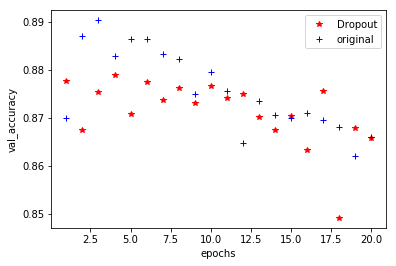

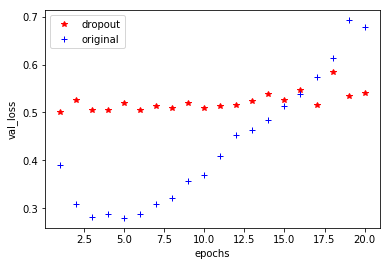

In [44]:
history_dropout.history.keys()
historyory_dict=history_dropout.history
val_acc_dropout=historyory_dict['val_acc']
plt.plot(epochs,val_acc_dropout,'red',marker='*',linestyle='None',label='Dropout')
plt.plot(epochs,val_acc1,'blue',marker='+',linestyle='None',label='original')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

history_dropout.history.keys()
historyory_dict=history_dropout.history
val_loss_dropout=historyory_dict['val_loss']
plt.plot(epochs,val_loss_dropout,'red',marker='*',linestyle='None',label='dropout')
plt.plot(epochs,val_loss1,'blue',marker='+',linestyle='None',label='original')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.legend()
plt.show()

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
